In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chardet
with open('MSD_Features.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7290861037696481, 'language': ''}

In [3]:
df1=pd.read_csv('MSD_Features.csv',encoding= 'ISO-8859-1')
df1.head()

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [4]:
df1['ID']=df1[['4','5']].apply(lambda x: ' '.join(x),axis=1)
df1=df1.rename({'0':'Artist','1':'Album','2':'Track','3':'Year'},axis=1)

In [5]:
df1.drop(['4','5'],axis=1,inplace=True)
df1.head()

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ID
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,TRAAADZ128F9348C2E 5JeyXbf7CrVQ8DqwFikN0P
1,JennyAnyKind,I Need You,Young Boy Blues,2000,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,TRAAAVO128F93133D4 5uN6oY2NGLC6GKoywHKkZA
2,Casual,Fear Itself,I Didn't Mean To,1994,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,TRAAAAW128F429D538 01TR6aAKrA2cI3Z0gnCOsu
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,TRAAAMO128F1481E7F 7ERvcsBBYzSHqQQqlI9xAN
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,TRAAAPK128E0786D96 6dfppQDZQ4x3fCs6N89kV3


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            5603 non-null   object 
 1   Album             5603 non-null   object 
 2   Track             5603 non-null   object 
 3   Year              5603 non-null   int64  
 4   danceability      5603 non-null   float64
 5   energy            5603 non-null   float64
 6   key               5603 non-null   int64  
 7   loudness          5603 non-null   float64
 8   mode              5603 non-null   int64  
 9   speechiness       5603 non-null   float64
 10  acousticness      5603 non-null   float64
 11  instrumentalness  5603 non-null   float64
 12  liveness          5603 non-null   float64
 13  valence           5603 non-null   float64
 14  tempo             5603 non-null   float64
 15  duration_ms       5603 non-null   int64  
 16  ID                5603 non-null   object 


In [7]:
df2=pd.read_csv('BillBoard_Features.csv')
df2.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [8]:
df2.rename(columns={'SpotifyID':'ID'},inplace=True)
df2.head()

,Track,Artist,ID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   ID                9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


In [10]:
MSD_Billboard=pd.concat([df1,df2],axis=0,ignore_index=True)

In [11]:
MSD_Billboard.tail(10)

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ID
14922,Linda Ronstadt (Featuring Aaron Neville),NaN,All My Life,NaN,0.602,0.523,3,-8.753,1,0.0340,0.44400,0.000005,0.0500,0.3740,74.005,210960,6mHrQvPTT3i4ZwwcR4gZR2
14923,Leila K With Rob 'N' Raz,NaN,Got To Get,NaN,0.922,0.733,8,-12.590,1,0.0624,0.04850,0.086500,0.3970,0.8610,115.621,281267,141Cw4LvVrUWn9gHVHOGtx
14924,Young M.C.,NaN,I Come Off,NaN,0.754,0.906,1,-4.989,1,0.0989,0.01390,0.000010,0.3320,0.9280,95.467,246160,3vlTwuK1urCWqj0PcZIUgZ
14925,Young M.C.,NaN,Bust A Move,NaN,0.946,0.772,4,-7.537,0,0.1210,0.05120,0.000002,0.0612,0.7430,116.972,263914,3IeCYkdKI55mNMl2o4vX0k
14926,McAuley Schenker Group,NaN,Anytime,NaN,0.448,0.812,1,-2.897,0,0.0350,0.01260,0.000607,0.1290,0.0632,110.990,361081,2f73ZxSCPX65SZCM9oXd4M
14927,The 2 Live Crew,NaN,Me So Horny,NaN,0.893,0.523,1,-11.157,1,0.0986,0.00336,0.000500,0.0833,0.9490,132.737,260441,6rQ9ypCfSRZs2AqqobvXu3
14928,Technotronic Featuring Felly,NaN,Pump Up The Jam,NaN,0.867,0.911,10,-7.375,0,0.1150,0.02390,0.000000,0.0491,0.6750,124.810,215040,0UAEHlFR79k9CJvknSGUNf
14929,Mantronix Featuring Wondress,NaN,Got To Have Your Love,NaN,0.763,0.505,10,-13.669,0,0.0753,0.17900,0.001070,0.0497,0.9600,105.632,383333,7MZzwdBfX8Dq0xFLFfxtdJ
14930,Entouch Featuring Keith Sweat,NaN,All Nite,NaN,0.834,0.485,11,-13.040,1,0.0453,0.04780,0.000051,0.1030,0.9290,107.598,368467,6q989QMsV87X9Em9J6DONi
14931,Prince With Sheena Easton,NaN,The Arms Of Orion,NaN,0.604,0.316,2,-14.674,1,0.0302,0.56000,0.000012,0.0905,0.3910,129.693,302973,0YcUNHmnt35v7J7amKvgR4


In [12]:
MSD_Billboard.shape

(14932, 17)

In [13]:
MSD_Billboard=MSD_Billboard.sort_values('Track')

In [14]:
MSD_Billboard.head()

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ID
12691,Young And Restless,NaN,"""B"" Girls",NaN,0.615,0.497,7,-11.913,1,0.4390,0.01600,0.000000,0.3120,0.769,193.762,242107,0rWUHulFlScxQsCq7kWKde
10053,Nelly,NaN,#1,NaN,0.690,0.592,7,-5.973,1,0.3000,0.02360,0.000000,0.5600,0.466,179.980,198760,7rSj5gEdN5KgHwbnEVAZ4b
13589,Mariah Carey Featuring Miguel,NaN,#Beautiful,NaN,0.677,0.749,4,-5.405,1,0.0391,0.34600,0.000000,0.3470,0.469,107.042,199867,617KSbx52ACbnQBxSsG26X
6949,The Chainsmokers,NaN,#SELFIE,NaN,0.789,0.915,0,-3.263,1,0.2480,0.01350,0.000009,0.0818,0.660,127.955,183750,1HOlb9rdNOmy9b1Fakicjo
13606,will.i.am Featuring Justin Bieber,NaN,#thatPOWER,NaN,0.797,0.608,6,-6.096,0,0.0583,0.00112,0.000077,0.0748,0.403,128.000,279507,01TuObJVd7owWchVRuQbQw


In [15]:
MSD_Billboard.drop_duplicates(subset='Track',keep=False,inplace=True)
MSD_Billboard.head()

,Artist,Album,Track,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ID
12691,Young And Restless,NaN,"""B"" Girls",NaN,0.615,0.497,7,-11.913,1,0.4390,0.01600,0.000000,0.3120,0.769,193.762,242107,0rWUHulFlScxQsCq7kWKde
10053,Nelly,NaN,#1,NaN,0.690,0.592,7,-5.973,1,0.3000,0.02360,0.000000,0.5600,0.466,179.980,198760,7rSj5gEdN5KgHwbnEVAZ4b
13589,Mariah Carey Featuring Miguel,NaN,#Beautiful,NaN,0.677,0.749,4,-5.405,1,0.0391,0.34600,0.000000,0.3470,0.469,107.042,199867,617KSbx52ACbnQBxSsG26X
6949,The Chainsmokers,NaN,#SELFIE,NaN,0.789,0.915,0,-3.263,1,0.2480,0.01350,0.000009,0.0818,0.660,127.955,183750,1HOlb9rdNOmy9b1Fakicjo
13606,will.i.am Featuring Justin Bieber,NaN,#thatPOWER,NaN,0.797,0.608,6,-6.096,0,0.0583,0.00112,0.000077,0.0748,0.403,128.000,279507,01TuObJVd7owWchVRuQbQw


In [16]:
MSD_Billboard.shape

(12127, 17)

In [17]:
MSD_Billboard.isnull().sum()

Artist                 2
Album               7167
Track                  1
Year                7167
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
ID                     0
dtype: int64

In [18]:
(MSD_Billboard.isnull().sum()*100)/MSD_Billboard.shape[0]

Artist               0.016492
Album               59.099530
Track                0.008246
Year                59.099530
danceability         0.000000
energy               0.000000
key                  0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
acousticness         0.000000
instrumentalness     0.000000
liveness             0.000000
valence              0.000000
tempo                0.000000
duration_ms          0.000000
ID                   0.000000
dtype: float64

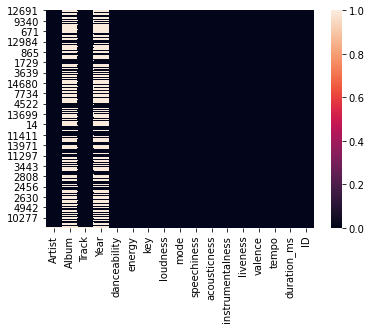

In [19]:
sns.heatmap(MSD_Billboard.isnull())
plt.show()

In [20]:
#we have more than 50% of values are null in column Album and Year
#so we remove those columns
MSD_Billboard.drop('Album',axis=1,inplace=True)
MSD_Billboard.drop('Year',axis=1,inplace=True)

In [21]:
MSD_Billboard.shape

(12127, 15)

In [25]:
MSD_Billboard=MSD_Billboard.dropna()

In [27]:
MSD_Billboard.shape

(12125, 15)

In [26]:
MSD_Billboard.isnull().sum()

Artist              0
Track               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
ID                  0
dtype: int64